In [2]:
%%bigquery flights_df
SELECT  if(ARR_DELAY <15 ,'on_time', 'late') on_time,
DEP_DELAY, DISTANCE, origin, dest, taxi_out
FROM `big-data-esp-up-2024.dsongcp.flights` 
where CANCELLED=FALSE and DIVERTED=FALSE

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
flights_df

,on_time,DEP_DELAY,DISTANCE,origin,dest,taxi_out
0,on_time,-8.0,692.00,ATL,ABE,12.0
1,late,107.0,692.00,ATL,ABE,15.0
2,on_time,-2.0,692.00,ATL,ABE,17.0
3,on_time,0.0,692.00,ATL,ABE,17.0
4,on_time,6.0,692.00,ATL,ABE,13.0
...,...,...,...,...,...,...
5714003,on_time,-8.0,160.00,PHX,YUM,12.0
5714004,late,3.0,160.00,PHX,YUM,22.0
5714005,on_time,0.0,160.00,PHX,YUM,29.0
5714006,on_time,-3.0,160.00,PHX,YUM,11.0


In [6]:
flights_df.describe()

,DEP_DELAY,taxi_out
count,5.714008e+06,5.714008e+06
mean,9.294842e+00,1.606550e+01
std,3.688972e+01,8.882449e+00
min,-8.200000e+01,1.000000e+00
25%,-5.000000e+00,1.100000e+01
50%,-2.000000e+00,1.400000e+01
75%,7.000000e+00,1.900000e+01
max,1.988000e+03,2.250000e+02


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='DEP_DELAY'>

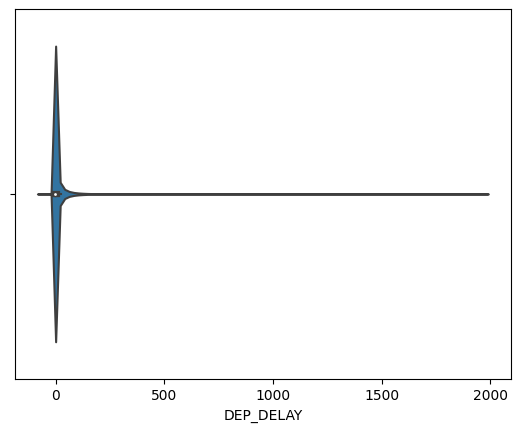

In [9]:
sns.violinplot(data=flights_df, x='DEP_DELAY')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(flights_df[['DEP_DELAY','DISTANCE']], flights_df['on_time'], test_size=0.2)

In [17]:
model= LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
predictions=model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [26]:
accuracy = accuracy_score(y_test, predictions)
f1= f1_score(y_test, predictions, pos_label="on_time")
precision= precision_score(y_test, predictions,pos_label="on_time")
recall= recall_score(y_test, predictions,pos_label="on_time")
print(f"Log Reg accuracy {accuracy}")
print(f"Log Reg f1 {f1}")
print(f"Log Reg precision {precision}")
print(f"Log Reg recall {recall}")

Log Reg accuracy 0.9307237824225019
Log Reg f1 0.9584247742531777
Log Reg precision 0.9366777421596493
Log Reg recall 0.9812056188522299
